## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import pandas as pd
import numpy as np

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as t:
  t.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labelz = pd.read_csv('labels.csv')

In [10]:
labelz.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
labelz.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [12]:
labelz['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [13]:
!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

     |████████████████████████████████| 102kB 2.9MB/s 


In [0]:
categorical_columns = ['breed']
encoder = ce.OneHotEncoder(cols=categorical_columns, use_cat_names=True)
labelz_encoded = encoder.fit_transform(labelz)

In [15]:
labelz_encoded.head(5)

,id,breed_boston_bull,breed_dingo,breed_pekinese,breed_bluetick,breed_golden_retriever,breed_bedlington_terrier,breed_borzoi,breed_basenji,breed_scottish_deerhound,breed_shetland_sheepdog,breed_walker_hound,breed_maltese_dog,breed_norfolk_terrier,breed_african_hunting_dog,breed_wire-haired_fox_terrier,breed_redbone,breed_lakeland_terrier,breed_boxer,breed_doberman,breed_otterhound,breed_standard_schnauzer,breed_irish_water_spaniel,breed_black-and-tan_coonhound,breed_cairn,breed_affenpinscher,breed_labrador_retriever,breed_ibizan_hound,breed_english_setter,breed_weimaraner,breed_giant_schnauzer,breed_groenendael,breed_dhole,breed_toy_poodle,breed_border_terrier,breed_tibetan_terrier,breed_norwegian_elkhound,breed_shih-tzu,breed_irish_terrier,breed_kuvasz,...,breed_brabancon_griffon,breed_toy_terrier,breed_chow,breed_flat-coated_retriever,breed_norwich_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_english_foxhound,breed_gordon_setter,breed_siberian_husky,breed_newfoundland,breed_briard,breed_chesapeake_bay_retriever,breed_dandie_dinmont,breed_great_pyrenees,breed_beagle,breed_vizsla,breed_west_highland_white_terrier,breed_kerry_blue_terrier,breed_whippet,breed_sealyham_terrier,breed_standard_poodle,breed_keeshond,breed_japanese_spaniel,breed_miniature_poodle,breed_pomeranian,breed_curly-coated_retriever,breed_yorkshire_terrier,breed_pembroke,breed_great_dane,breed_blenheim_spaniel,breed_silky_terrier,breed_sussex_spaniel,breed_german_short-haired_pointer,breed_french_bulldog,breed_bouvier_des_flandres,breed_tibetan_mastiff,breed_english_springer,breed_cocker_spaniel,breed_rottweiler
0,000bec180eb18c7604dcecc8fe0dba07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001513dfcb2ffafc82cccf4d8bbaba97,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001cdf01b096e06d78e9e5112d419397,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_enc = labelz_encoded.iloc[:,1:121]

In [0]:
y_enc = np.array(y_enc)

In [18]:
y_enc

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
y_enc = y_enc.astype('float32')

In [20]:
y_enc.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [22]:
from tqdm import tqdm
import cv2
x_train = []
y_train = []
i = 0
for f,img in tqdm(labelz.values):
  train_img = cv2.imread('/content/train/{}.jpg'.format(f), 1)
  img_resize = cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(img_resize)
  y_train.append(img)
  

  
    
     

    
    
    

100%|██████████| 10222/10222 [00:27<00:00, 366.18it/s]


In [23]:
y_train[0]

'boston_bull'

In [24]:
x_train

[array([[[ 69, 116, 173],
         [ 38,  91, 136],
         [102, 166, 204],
         ...,
         [130, 204, 237],
         [ 85, 193, 220],
         [ 59, 138, 170]],
 
        [[ 42,  77, 118],
         [142, 180, 216],
         [119, 162, 197],
         ...,
         [ 80, 152, 194],
         [101, 183, 218],
         [ 74, 177, 212]],
 
        [[ 65, 107, 151],
         [ 57, 103, 147],
         [ 66, 107, 153],
         ...,
         [ 37, 121, 172],
         [ 73, 145, 183],
         [ 64, 168, 207]],
 
        ...,
 
        [[ 77, 119, 190],
         [ 66, 121, 186],
         [ 66, 122, 183],
         ...,
         [ 70,  91, 159],
         [ 59,  89, 154],
         [ 91, 132, 184]],
 
        [[ 65, 118, 185],
         [ 72, 124, 190],
         [ 74, 125, 187],
         ...,
         [ 54,  63, 132],
         [ 74, 116, 169],
         [121, 169, 223]],
 
        [[ 63, 116, 183],
         [ 73, 125, 191],
         [ 76, 127, 190],
         ...,
         [ 50,  51, 127],
  

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train2 = np.array(x_train)

In [26]:
x_train2.dtype

dtype('uint8')

In [27]:
x_train2.shape

(10222, 128, 128, 3)

In [28]:
x_train2.ndim

4

In [0]:
x_train2 = x_train2.astype('float32')

In [0]:
x_train2 = x_train2/255

In [0]:
x_train2_copy = x_train2.copy()

In [32]:
x_train2_copy.shape

(10222, 128, 128, 3)

In [0]:
X_train2 = np.concatenate((x_train2,x_train2_copy), axis=0)

In [34]:
X_train2.shape

(20444, 128, 128, 3)

In [35]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
y_train2 = y_enc

In [0]:
y_train2_copy = y_train2.copy()

In [0]:
Y_train2 = np.concatenate((y_train2,y_train2_copy),axis=0)

In [39]:
Y_train2.shape

(20444, 120)

In [40]:
Y_train2.ndim

2

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train2, Y_train2, test_size=0.30, random_state=42)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
samples = pd.read_csv('sample_submission.csv')


In [0]:
samples.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img = samples['id']

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:30<00:00, 335.96it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature = np.array(x_test_feature)

In [0]:
x_test_feature.shape

(10357, 128, 128, 3)

In [0]:
x_test_feature.ndim

4

In [0]:
x_test_feature = x_test_feature/255

In [0]:
x_test_feature = x_test_feature.astype('float32')

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
model2 = Sequential()
model2.add(Convolution2D(20, 5, 3, input_shape=(128, 128, 3)))
model2.add(Activation('relu'))
model2.add(Convolution2D(20, 5, 3))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(120))
model2.add(Activation('softmax'))


### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
BATCH_SIZE = 128
EPOCHS = 10

In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model2.fit(X_train, Y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,validation_data=(X_test, Y_test), callbacks=callback_list, verbose=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 7155 samples, validate on 3067 samples
Epoch 1/10
7155/7155 [==============================] - 479s 67ms/step - loss: 5.2196 - acc: 0.0109 - val_loss: 4.7787 - val_acc: 0.0209
Epoch 2/10
7155/7155 [==============================] - 473s 66ms/step - loss: 4.5121 - acc: 0.0618 - val_loss: 4.7220 - val_acc: 0.0218
Epoch 3/10
7155/7155 [==============================] - 471s 66ms/step - loss: 2.5668 - acc: 0.4640 - val_loss: 5.6140 - val_acc: 0.0261
Epoch 4/10
7155/7155 [==============================] - 471s 66ms/step - loss: 0.4068 - acc: 0.9242 - val_loss: 7.9115 - val_acc: 0.0254
Epoch 5/10
7155/7155 [==============================] - 477s 67ms/step - loss: 0.0440 - acc: 0.9947 - val_loss: 8.6377 - val_acc: 0.0261
Epoch 6/10
7155/7155 [==============================] - 474s 66ms/step - loss: 0.0188 - acc: 0.9979 - val_loss: 9.3522 - val_acc: 0.0274
Epoch 7/10
7155/7155 [==============================] - 473s 66ms/step - loss: 0.0152 - acc: 0.9983 - val_loss: 8.7483 - val_acc: 

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
data_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=90,width_shift_range=0.2,height_shift_range=0.2)
    

In [0]:
val_gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=90,width_shift_range=0.2,height_shift_range=0.2)

In [0]:
data_gen.fit(X_train)

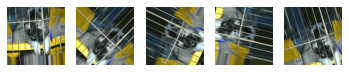

In [0]:
from matplotlib import pyplot as plt
gen = data_gen.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
val_gen.fit(X_test)

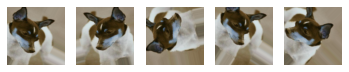

In [0]:
from matplotlib import pyplot as plt
gen = val_gen.flow(X_test[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
train_generator = data_gen.flow(X_train,Y_train,batch_size=128)
val_generator = val_gen.flow(X_test,Y_test,batch_size=128)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model2.fit_generator(train_generator,epochs=10,steps_per_epoch=len(X_train) /128,validation_data=val_generator,callbacks=callback_list)
        

Epoch 1/10
56/55 [==============================] - 506s 9s/step - loss: 4.7609 - acc: 0.0168 - val_loss: 4.7623 - val_acc: 0.0212
Epoch 2/10
56/55 [==============================] - 480s 9s/step - loss: 4.7446 - acc: 0.0161 - val_loss: 4.7564 - val_acc: 0.0127
Epoch 3/10
56/55 [==============================] - 475s 8s/step - loss: 4.7308 - acc: 0.0178 - val_loss: 4.7408 - val_acc: 0.0176
Epoch 4/10
56/55 [==============================] - 487s 9s/step - loss: 4.7178 - acc: 0.0176 - val_loss: 4.7471 - val_acc: 0.0130
Epoch 5/10
56/55 [==============================] - 497s 9s/step - loss: 4.7124 - acc: 0.0207 - val_loss: 4.7141 - val_acc: 0.0189
Epoch 6/10
56/55 [==============================] - 508s 9s/step - loss: 4.6980 - acc: 0.0215 - val_loss: 4.7057 - val_acc: 0.0186
Epoch 7/10
56/55 [==============================] - 506s 9s/step - loss: 4.6873 - acc: 0.0229 - val_loss: 4.6947 - val_acc: 0.0199
Epoch 8/10
56/55 [==============================] - 504s 9s/step - loss: 4.6817 - a

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
tf.__version__

'2.2.0-rc1'

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=("/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"),
                 include_top=False, pooling='avg',input_shape=(128,128,3))

Print the summary of the base_model

In [0]:
print (base_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Let us reconstruct the model architecture and try to fit the the same train and val data and check if there is any improvement in accuracy.

In [0]:
model = Sequential()
model.add(Convolution2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",name='conv_1'))
model.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",name='conv_13'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='max_1'))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",name='conv_2'))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",name='conv_3'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='max_2'))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='conv_4'))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='conv_5'))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",name='conv_6'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='max_3'))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='conv_7'))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='conv_8'))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='conv_9'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='max_4'))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='conv_10'))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='conv_11'))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",name='conv_12'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='max_5'))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(120))
model.add(Activation('softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
   if('conv' in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_13
False
max_1
True
conv_2
False
conv_3
False
max_2
True
conv_4
False
conv_5
False
conv_6
False
max_3
True
conv_7
False
conv_8
False
conv_9
False
max_4
True
conv_10
False
conv_11
False
conv_12
False
max_5
True
flatten
True
dense
True
activation
True
dense_1
True
activation_1
True
dense_2
True
activation_2
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
#Let us load the weights of the vgg model.

In [0]:
model.load_weights("/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",by_name = True)

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001,momentum=0.9)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
56/56 [==============================] - 10s 183ms/step - loss: 4.7877 - accuracy: 0.0098 - val_loss: 4.7854 - val_accuracy: 0.0134
Epoch 2/10
56/56 [==============================] - 8s 147ms/step - loss: 4.7812 - accuracy: 0.0113 - val_loss: 4.7814 - val_accuracy: 0.0140
Epoch 3/10
56/56 [==============================] - 8s 146ms/step - loss: 4.7740 - accuracy: 0.0130 - val_loss: 4.7753 - val_accuracy: 0.0091
Epoch 4/10
56/56 [==============================] - 8s 146ms/step - loss: 4.7518 - accuracy: 0.0131 - val_loss: 4.7305 - val_accuracy: 0.0140
Epoch 5/10
56/56 [==============================] - 8s 145ms/step - loss: 4.6826 - accuracy: 0.0158 - val_loss: 4.6380 - val_accuracy: 0.0150
Epoch 6/10
56/56 [==============================] - 8s 147ms/step - loss: 4.6204 - accuracy: 0.0173 - val_loss: 4.6073 - val_accuracy: 0.0186
Epoch 7/10
56/56 [==============================] - 8s 145ms/step - loss: 4.5973 - accuracy: 0.0219 - val_loss: 4.5939 - val_accuracy: 0.0196
Epoch

In [0]:
#As we can see there is no improvement in accuracy even after using the weights of the vgg model.
#By default the vgg model was built on images of size (224,224). Let us try to resize the image and fit it on the above model and check.

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model2= VGG16(weights=("/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"),
                 include_top=False, pooling='avg',input_shape=(128,128,3))

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers



In [0]:
from tensorflow.keras.models import Model

In [0]:
for layer in base_model2.layers:
    layer.trainable = False

In [0]:
headModel = base_model2.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = tf.keras.layers.BatchNormalization()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = tf.keras.layers.BatchNormalization()(headModel)
headModel = Dense(120, activation="softmax")(headModel)

In [0]:
final_model = Model(inputs=base_model2.input, outputs=headModel)

In [49]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
optimizer = Adam(lr=0.01)
#Set the loss function and optimizer for the model training
final_model.compile(loss=categorical_crossentropy,
              optimizer= optimizer,
              metrics=['accuracy'])

In [0]:
for layer in final_model.layers[:-5]:
    layer.trainable = False

In [96]:
final_model.fit(X_train, Y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
112/112 [==============================] - 16s 140ms/step - loss: 0.1505 - accuracy: 0.9572 - val_loss: 5.0060 - val_accuracy: 0.6549
Epoch 2/20
112/112 [==============================] - 16s 140ms/step - loss: 0.1057 - accuracy: 0.9692 - val_loss: 4.8053 - val_accuracy: 0.7098
Epoch 3/20
112/112 [==============================] - 16s 140ms/step - loss: 0.0798 - accuracy: 0.9753 - val_loss: 4.6054 - val_accuracy: 0.7183
Epoch 4/20
112/112 [==============================] - 16s 140ms/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 4.4672 - val_accuracy: 0.7266
Epoch 5/20
112/112 [==============================] - 16s 140ms/step - loss: 0.0603 - accuracy: 0.9829 - val_loss: 4.4496 - val_accuracy: 0.7331
Epoch 6/20
112/112 [==============================] - 16s 140ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 5.2793 - val_accuracy: 0.6966
Epoch 7/20
112/112 [==============================] - 16s 140ms/step - loss: 0.0661 - accuracy: 0.9797 - val_loss: 4.9252 - val_ac

In [0]:
#Let us try to improve the model performance with the help of smote, so that we can increase the number of minority classes

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE('minority')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [99]:
X_train.shape

(14310, 128, 128, 3)

In [0]:
X_reshaped = X_train.reshape(14310,49152)

In [101]:
X_sm,Y_sm = sm.fit_sample(X_reshaped,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [104]:
X_sm.shape

(14401, 49152)

In [0]:
X_sm_reshaped = X_sm.reshape(14401,128,128,3)

In [106]:
X_sm_reshaped.shape

(14401, 128, 128, 3)

In [0]:
#Now let us fit the smote applied X_sm_reshaped to our model

In [107]:
final_model.fit(X_sm_reshaped,Y_sm,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
113/113 [==============================] - 16s 146ms/step - loss: 0.1070 - accuracy: 0.9708 - val_loss: 5.0034 - val_accuracy: 0.7000
Epoch 2/20
113/113 [==============================] - 16s 140ms/step - loss: 0.1069 - accuracy: 0.9705 - val_loss: 5.1343 - val_accuracy: 0.6674
Epoch 3/20
113/113 [==============================] - 16s 141ms/step - loss: 0.0935 - accuracy: 0.9722 - val_loss: 5.3595 - val_accuracy: 0.6989
Epoch 4/20
113/113 [==============================] - 16s 140ms/step - loss: 0.0764 - accuracy: 0.9767 - val_loss: 5.0745 - val_accuracy: 0.7186
Epoch 5/20
113/113 [==============================] - 16s 140ms/step - loss: 0.0684 - accuracy: 0.9797 - val_loss: 5.0268 - val_accuracy: 0.7245
Epoch 6/20
113/113 [==============================] - 16s 141ms/step - loss: 0.0589 - accuracy: 0.9823 - val_loss: 4.9943 - val_accuracy: 0.7281
Epoch 7/20
113/113 [==============================] - 16s 140ms/step - loss: 0.0547 - accuracy: 0.9835 - val_loss: 5.2505 - val_ac

In [0]:
#In the above excersise 3 models were built with 3 different approaches
#NOTE1: For the basic sequential model and hand coded vgg model, the original data set was used as such (10,222) images.(kindly do not get confused as i have used the same variable X_train,Y_train)
#..Since the data was less and the number of classes were more the accuracy level was very minimal.
#NOTE2: To overcome the above difficulty, a copy of the original image array was made and appended with the train set(and used in final_model). Thus
#... now we had twice the amount of data than before. Even though we can not say that the idea of feeding repeated image is viable
#....in our case it has definitely improved the model performance to a drastic level.
#NOTE3: We have tried smote approach to give good representation to the minority class, even though it has not improved the overall accuracy 
#..of the model,we can see that the accuracy level at each epoch has now stabilised.